In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_excel(r"C:\Users\abhisv.CORP\3D Objects\SALVSBUY.xlsx")

In [17]:
df.shape

(14, 2)

In [18]:
df.columns

Index(['Salary', 'Buy'], dtype='object')

In [19]:
x=df['Salary']

In [20]:
x=pd.DataFrame(x)

In [21]:
y=df['Buy']

In [22]:
y=pd.DataFrame(y)

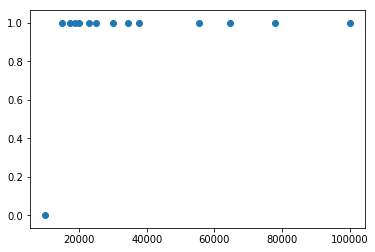

In [23]:
plt.scatter(x,y)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
y_pred=lr.predict(y)

D:\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
from sklearn.metrics import r2_score,confusion_matrix,f1_score,classification_report

In [51]:
cm=confusion_matrix(y,y_pred)

In [52]:
cm

array([[ 1,  0],
       [ 0, 13]], dtype=int64)

In [53]:
r2_score(y,y_pred)

1.0

In [54]:
lr.predict([[100000]])

array([1], dtype=int64)

In [55]:
df

,Salary,Buy
0,10000,0
1,20000,1
2,15000,1
3,25000,1
4,30000,1
5,23000,1
6,17300,1
7,55555,1
8,77777,1
9,99999,1


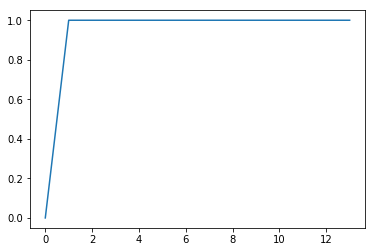

In [56]:
plt.plot(y)

In [57]:
f1=f1_score(y,y_pred)

In [58]:
f1

1.0

In [65]:
cr=classification_report(y,y_pred)

In [68]:
cr

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00        13\n\n    accuracy                           1.00        14\n   macro avg       1.00      1.00      1.00        14\nweighted avg       1.00      1.00      1.00        14\n'

In [ ]:
//////////////Decision tree

In [69]:
import pandas as pd
import numpy as np

In [70]:
df=pd.read_excel(r"D:\Users\abhisv\Desktop\decision tree.xlsx")

In [71]:
df.shape

(119, 4)

In [72]:
df.head(1)

,Cloudy,Windy,Cold,Play
0,1,1,1,1


In [73]:
x=df[['Cloudy','Windy','Cold']]
y=df['Play']

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier( criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtc.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
y_pred=dtc.predict(x)

In [92]:
from sklearn.metrics import confusion_matrix,r2_score
cm=confusion_matrix(y,y_pred)

In [93]:
cm

array([[42, 17],
       [16, 44]], dtype=int64)

In [94]:
r2_score(y,y_pred)

-0.1093220338983052

In [95]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[0:3])
features

['Cloudy', 'Windy', 'Cold']

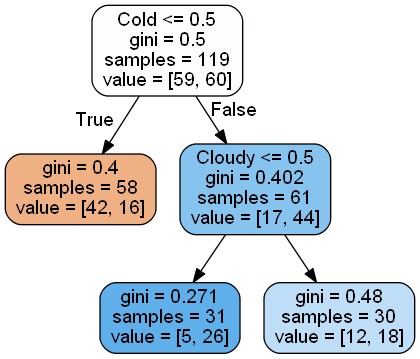

In [96]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())